In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/desktop/rypy')

In [2]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
import mpl
% matplotlib inline

In [3]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

Relevant to SDEs:
    $$dS = \sqrt{V}Sd(\rho W^1 + \bar{\rho} W^2),\quad dV = \alpha\beta\sqrt{V}dW^1 + \beta(\gamma - V)dt,\quad V_0 = v_0.$$
$$$$

In [4]:
α,β,γ,v0,ρ = 1.5,3,0.3**2,0.1**2,-0.5
# α,β,γ,v0,ρ = 1,1,1,1,0
θ = α,β,γ,v0,ρ

In [5]:
rp.char_func(u=0.5,t=0.5,θ=θ)

(0.99603222065982677-0.0050673844589664641j)

In [6]:
rp.char_func(u=0.5,t=0.5,θ=θ) - (0.99603222065982677-0.0050673844589664598j)

-4.3368086899420177e-18j

In [15]:
T = np.array([1/52,2/52,1/12,3/12,6/12,1])[:,nx]
M = ['1w','2w','1m','3m','6m','1y']
Δ = np.linspace(1,99,21)[nx,:]/100
k = norm.ppf(Δ)*np.sqrt((v0 + γ)/2*T)

In [16]:
pd.DataFrame(k,index=M,columns=k[0,:])

,-0.0721369852797,-0.0484735075357,-0.0383650162829,-0.031221535897,-0.0254388774082,-0.020429689589,-0.0159052968358,-0.0116975178833,-0.00769554032528,-0.00381826194284,...,0.00381826194284,0.00769554032528,0.0116975178833,0.0159052968358,0.020429689589,0.0254388774082,0.031221535897,0.0383650162829,0.0484735075357,0.0721369852797
1w,-0.072137,-0.048474,-0.038365,-0.031222,-0.025439,-0.020430,-0.015905,-0.011698,-0.007696,-0.003818,...,0.003818,0.007696,0.011698,0.015905,0.020430,0.025439,0.031222,0.038365,0.048474,0.072137
2w,-0.102017,-0.068552,-0.054256,-0.044154,-0.035976,-0.028892,-0.022493,-0.016543,-0.010883,-0.005400,...,0.005400,0.010883,0.016543,0.022493,0.028892,0.035976,0.044154,0.054256,0.068552,0.102017
1m,-0.150165,-0.100906,-0.079863,-0.064993,-0.052955,-0.042528,-0.033110,-0.024350,-0.016020,-0.007948,...,0.007948,0.016020,0.024350,0.033110,0.042528,0.052955,0.064993,0.079863,0.100906,0.150165
3m,-0.260094,-0.174774,-0.138327,-0.112571,-0.091721,-0.073660,-0.057347,-0.042176,-0.027747,-0.013767,...,0.013767,0.027747,0.042176,0.057347,0.073660,0.091721,0.112571,0.138327,0.174774,0.260094
6m,-0.367828,-0.247167,-0.195624,-0.159199,-0.129713,-0.104171,-0.081101,-0.059646,-0.039240,-0.019469,...,0.019469,0.039240,0.059646,0.081101,0.104171,0.129713,0.159199,0.195624,0.247167,0.367828
1y,-0.520187,-0.349547,-0.276654,-0.225142,-0.183442,-0.147321,-0.114695,-0.084352,-0.055493,-0.027534,...,0.027534,0.055493,0.084352,0.114695,0.147321,0.183442,0.225142,0.276654,0.349547,0.520187


In [17]:
C = rp.pricer(T,k,θ)

In [18]:
BSV = rp.surface(T,k,C)

In [19]:
pd.DataFrame(BSV,index=M,columns=k[0,:])

,-0.0721369852797,-0.0484735075357,-0.0383650162829,-0.031221535897,-0.0254388774082,-0.020429689589,-0.0159052968358,-0.0116975178833,-0.00769554032528,-0.00381826194284,...,0.00381826194284,0.00769554032528,0.0116975178833,0.0159052968358,0.020429689589,0.0254388774082,0.031221535897,0.0383650162829,0.0484735075357,0.0721369852797
1w,0.255661,0.207282,0.183591,0.165373,0.149532,0.134865,0.120727,0.106696,0.092478,0.078045,...,0.062041,0.069319,0.078884,0.088901,0.099165,0.109852,0.121371,0.134547,0.151550,0.185813
2w,0.270525,0.216119,0.190021,0.170214,0.153174,0.137542,0.122598,0.107875,0.093048,0.078066,...,0.062213,0.070414,0.080813,0.091688,0.102896,0.114665,0.127478,0.142307,0.161705,0.201567
1m,0.287459,0.228277,0.200354,0.179359,0.161430,0.145091,0.129570,0.114380,0.099204,0.084045,...,0.067713,0.075596,0.086171,0.097453,0.109226,0.121714,0.135442,0.151496,0.172763,0.217391
3m,0.317912,0.254174,0.224473,0.202313,0.183522,0.166524,0.150522,0.135050,0.119870,0.105146,...,0.087416,0.092311,0.101550,0.112350,0.124078,0.136801,0.151008,0.167834,0.190403,0.238647
6m,0.338199,0.273257,0.243158,0.220794,0.201916,0.184936,0.169067,0.153881,0.139207,0.125274,...,0.106958,0.108656,0.115627,0.125050,0.135894,0.148012,0.161783,0.178287,0.200626,0.248834
1y,0.353596,0.289862,0.260450,0.238690,0.220413,0.204078,0.188941,0.174621,0.160994,0.148275,...,0.130051,0.128428,0.131974,0.138805,0.147701,0.158253,0.170656,0.185839,0.206691,0.252247


In [20]:
plt.rcParams['figure.figsize'] = [2*1.618*2,2*3]
plt.rcParams['legend.loc'] = 'upper right'

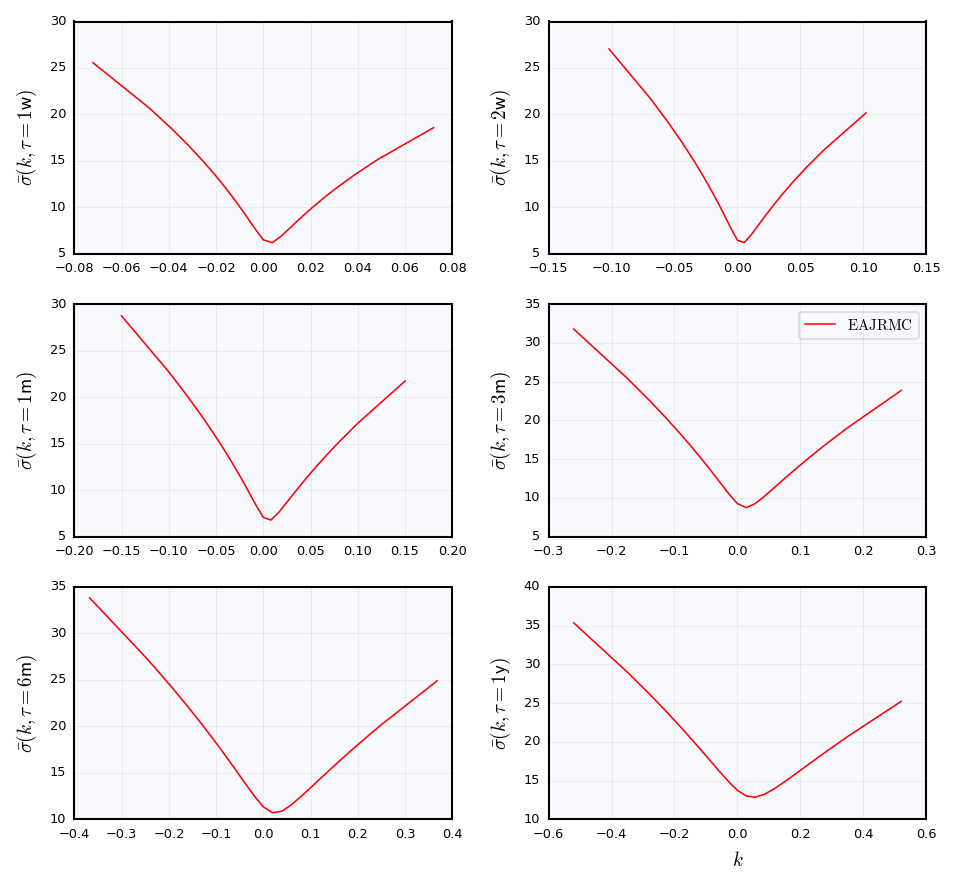

In [21]:
plot,axes = plt.subplots(3,2)
n = -1
for i in range(3):
    for j in range(2):
        n += 1
#         axes[i,j].plot(np.log(K),100*np.array(RHS.iloc[:,n+1]),'bo')
        axes[i,j].plot(k[n,:],100*BSV[n,:])
        axes[i,j].set_ylabel(r'$\bar{\sigma}(k,\tau=\mathsf{%s})$'%M[n])
#         axes[i,j].set_ylim([0,50])
# axes[0,1].set_title(r'$\varepsilon=\mathrm{%s}.$'%TS)
# axes[0,1].set_title(r'$H = 0.05,\ \ \varepsilon=\mathrm{%s}.$'%TS)
axes[1,1].legend([r'$\mathrm{EAJRMC}$'])
axes[2,1].set_xlabel(r'$k$')
plt.tight_layout()
# fname = r'test'
# plt.savefig(fname)